## WeatherPy Analysis

##### Observable Trends
- It appears that after several generations of the program, no matter what 500 cities we select, a distinct pattern appears on a scatterplot graph of 500 random city locations across the globe.
- This code was originally completed in 6/21/2018, summer in the North. The temperature graph appears to skew to more hotter temperatures recorded north of the equator to reflect the summer solstice and how the northern hemisphere is tilted slightly toward the Sun, which would be reflected in more recorded hot temperatures north of the equator.

##### Shape of Scatter Plots
- The distinct shapes of the graphs are notable, as the patterns are always the same no matter how many times the script is run. This all depends on the size of the graphs, but mine reflect these examples.
- The 'Temperature' pattern either looks like a dolphin or Cuba.
- The 'humidity' chart always generally looks like heavy clouds dispersing water particles down below. 
- The 'cloudiness' chart looks like an evaporating lake forming clouds. 
- The 'wind speed' chart looks like dandelion spores being dispersed. The pattern being the same seemingly no matter how many times we run the script is notable in this way too.

In [1]:
import random
from citipy import citipy
import pandas as pd
import openweathermapy.core as ow
import numpy as np
import matplotlib.pyplot as plt

#your openweathermap api key goes here. if you see this code on public github, please use your own api when running this code.
#or don't. i can't really stop you. but it'd be on your conscience until you ask me for forgiveness in person.
ow_api = "25bc90a1196e6f153eece0bc0b0fc9eb"
#ow settings
settings = {"units": "imperial", "appid": ow_api}

## Generate Cities List

In [2]:
#create a dataframe with a list of at least 500 random cities from citipy
#see citipy_testing.ipynb for a bunch of drafts

citynames = []
citycountries = []

#saw someone else do this. they set their range to 1500 so that they could trim it down...
for i in range(1500):
    randlat = random.uniform(-90, 90)
    randlong = random.uniform(-180, 180)
    city = citipy.nearest_city(randlat, randlong)
    citynames.append(city.city_name)
    citycountries.append(city.country_code)
    
city_df = pd.DataFrame({'City': citynames,
                  'Country': citycountries})

city_df.count()

City       1500
Country    1500
dtype: int64

In [3]:
#trim duplicates. if you have about 1300+ random results then you wind up with just over 500 unique values.
#this doesn't feel elegant at all but it sure is nice to watch in action
#it also gets trimmed down more later on when OWM doesn't find certain cities... edge-of-your-seat kinda stuff
city_df = city_df.drop_duplicates(keep="first")
city_df.count()

City       625
Country    625
dtype: int64

In [4]:
#setting index and adding columns to prepare for some really impressive stuff
city_df.set_index(['City', 'Country'])
city_df['City'] = city_df['City'].str.title()
city_df['Country'] = city_df['Country'].str.upper()
city_df['Latitude'] = ''
city_df['Longitude'] = ''
city_df['Temperature'] = ''
city_df['Humidity'] = ''
city_df['Cloudiness'] = ''
city_df['Wind Speed'] = ''
city_df['Description'] = ''
city_df['Time Retrieved'] = ''
city_df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Description,Time Retrieved
0,Senneterre,CA,,,,,,,,
1,Ponta Do Sol,CV,,,,,,,,
2,Vaini,TO,,,,,,,,
3,Cape Town,ZA,,,,,,,,
4,Mahebourg,MU,,,,,,,,


## Perform API Calls

In [5]:
#the big iterator. see citipy_testing.ipynb for drafts
#identifies the City Name in the dataframe, then finds it using the openweathermap wrapper. adds all relevant information.
#not all cities will be found by the wrapper, so we'll skip anything that doesn't return a value and place 'NaN' into its cell
#we'll delete that row later

#saving some variables for the printed statements down below
counter = 0
totalcities = city_df['City'].count().sum()

print(f"Retrieving OpenWeatherMaps weather data for {totalcities} random cities from citipy...")

#thanks to the NearestRestr and try/except exercises for this
for index, row in city_df.iterrows():

    cityloc = row['City'] + ',' + row['Country']
    
    try:
        data = ow.get_current(cityloc, **settings)
        row['Temperature'] = data('main.temp')
        row['Humidity'] = data('main.humidity')
        row['Cloudiness'] = data('clouds.all')
        row['Wind Speed'] = data('wind.speed')
        row['Latitude'] = data('coord.lat')
        row['Longitude'] = data('coord.lon')
        row['Description'] = data['weather'][0]['description']
        row['Time Retrieved'] = data('dt')
        print(f"Retrieving Data at index {index} for: {row['City']},{row['Country']}; loading values...")
    except:
        row['Latitude'] = np.NaN
        counter += 1
        print(f"Missing Data at index {index} for: {row['City']}, {row['Country']}; skipping...")

print(f"There were {totalcities} randomly selected citipy cities, and {counter} were missing weather data on OpenWeatherMaps.")

Retrieving OpenWeatherMaps weather data for 625 random cities from citipy...
Retrieving Data at index 0 for: Senneterre,CA; loading values...
Retrieving Data at index 1 for: Ponta Do Sol,CV; loading values...
Retrieving Data at index 2 for: Vaini,TO; loading values...
Retrieving Data at index 3 for: Cape Town,ZA; loading values...
Retrieving Data at index 4 for: Mahebourg,MU; loading values...
Retrieving Data at index 5 for: Kapaa,US; loading values...
Retrieving Data at index 6 for: Fort Nelson,CA; loading values...
Retrieving Data at index 7 for: Chicama,PE; loading values...
Retrieving Data at index 8 for: Tura,RU; loading values...
Retrieving Data at index 9 for: Busselton,AU; loading values...
Retrieving Data at index 10 for: Georgetown,SH; loading values...
Retrieving Data at index 11 for: Ushuaia,AR; loading values...
Retrieving Data at index 12 for: Rabat,MA; loading values...
Missing Data at index 13 for: Louisbourg, CA; skipping...
Retrieving Data at index 14 for: Traiguen,CL

Retrieving Data at index 166 for: Nouadhibou,MR; loading values...
Retrieving Data at index 167 for: Meulaboh,ID; loading values...
Retrieving Data at index 171 for: Caravelas,BR; loading values...
Retrieving Data at index 174 for: Dzhebariki-Khaya,RU; loading values...
Retrieving Data at index 175 for: Alofi,NU; loading values...
Retrieving Data at index 176 for: Cagliari,IT; loading values...
Retrieving Data at index 178 for: Deputatskiy,RU; loading values...
Retrieving Data at index 179 for: Pisco,PE; loading values...
Retrieving Data at index 180 for: Lebu,CL; loading values...
Retrieving Data at index 182 for: Tlaltizapan,MX; loading values...
Retrieving Data at index 183 for: Saskylakh,RU; loading values...
Retrieving Data at index 186 for: Klaksvik,FO; loading values...
Retrieving Data at index 187 for: Djambala,CG; loading values...
Retrieving Data at index 188 for: Sam Roi Yot,TH; loading values...
Retrieving Data at index 189 for: Puerto Rico,CO; loading values...
Retrieving 

Retrieving Data at index 427 for: Jiexiu,CN; loading values...
Missing Data at index 428 for: Yate, NC; skipping...
Missing Data at index 429 for: Bengkulu, ID; skipping...
Retrieving Data at index 430 for: Ahipara,NZ; loading values...
Retrieving Data at index 431 for: Namtsy,RU; loading values...
Retrieving Data at index 432 for: Butaritari,KI; loading values...
Retrieving Data at index 435 for: Lodja,CD; loading values...
Retrieving Data at index 436 for: Shimoda,JP; loading values...
Missing Data at index 438 for: Buariki, KI; skipping...
Retrieving Data at index 440 for: Kavaratti,IN; loading values...
Missing Data at index 449 for: Anar Darreh, AF; skipping...
Retrieving Data at index 454 for: Torbay,CA; loading values...
Retrieving Data at index 457 for: The Valley,AI; loading values...
Retrieving Data at index 459 for: Konyshevka,RU; loading values...
Retrieving Data at index 460 for: Mnogovershinnyy,RU; loading values...
Retrieving Data at index 462 for: Aguimes,ES; loading va

Retrieving Data at index 761 for: Sai Buri,TH; loading values...
Retrieving Data at index 763 for: Suoyarvi,RU; loading values...
Retrieving Data at index 764 for: Pitsunda,GE; loading values...
Retrieving Data at index 765 for: Sao Joao Da Barra,BR; loading values...
Missing Data at index 767 for: Karaul, RU; skipping...
Retrieving Data at index 772 for: Rypin,PL; loading values...
Retrieving Data at index 773 for: Teguise,ES; loading values...
Retrieving Data at index 774 for: Wuda,CN; loading values...
Retrieving Data at index 777 for: Warrnambool,AU; loading values...
Retrieving Data at index 778 for: Kyzyl,RU; loading values...
Retrieving Data at index 779 for: Kattivakkam,IN; loading values...
Retrieving Data at index 784 for: Santiago Del Estero,AR; loading values...
Retrieving Data at index 788 for: Alice Springs,AU; loading values...
Missing Data at index 789 for: Safaga, EG; skipping...
Missing Data at index 794 for: Labutta, MM; skipping...
Retrieving Data at index 795 for: 

Missing Data at index 1121 for: Tuggurt, DZ; skipping...
Retrieving Data at index 1126 for: Quirinopolis,BR; loading values...
Missing Data at index 1136 for: Tarudant, MA; skipping...
Retrieving Data at index 1147 for: La Ronge,CA; loading values...
Missing Data at index 1151 for: Warqla, DZ; skipping...
Retrieving Data at index 1155 for: Weiser,US; loading values...
Retrieving Data at index 1163 for: Ust-Omchug,RU; loading values...
Retrieving Data at index 1164 for: Saquarema,BR; loading values...
Retrieving Data at index 1166 for: Dawlatabad,AF; loading values...
Retrieving Data at index 1169 for: Nehe,CN; loading values...
Retrieving Data at index 1170 for: Smithers,CA; loading values...
Retrieving Data at index 1171 for: Post Falls,US; loading values...
Retrieving Data at index 1174 for: Provost,CA; loading values...
Retrieving Data at index 1181 for: Moura,PT; loading values...
Retrieving Data at index 1188 for: Porto Murtinho,BR; loading values...
Retrieving Data at index 1195 

In [6]:
#a look at the dataframe before dropping NaN values
city_df.head(20)

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Description,Time Retrieved
0,Senneterre,CA,48.39,-77.24,51.8,71,5,4,clear sky,1529632800
1,Ponta Do Sol,CV,17.2,-25.09,72.3,100,0,11.83,clear sky,1529637363
2,Vaini,TO,-21.2,-175.2,78.8,74,75,8.05,broken clouds,1529636400
3,Cape Town,ZA,-33.93,18.42,57.2,93,75,11.41,broken clouds,1529632800
4,Mahebourg,MU,-20.41,57.7,69.8,94,40,2.24,shower rain,1529632800
5,Kapaa,US,22.08,-159.32,83.21,66,40,12.75,scattered clouds,1529632560
6,Fort Nelson,CA,58.81,-122.69,71.6,64,75,8.05,light intensity shower rain,1529633400
7,Chicama,PE,-7.84,-79.15,64.4,93,75,6.93,mist,1529636400
8,Tura,RU,64.27,100.22,61.86,70,12,4.34,few clouds,1529637344
9,Busselton,AU,-33.64,115.35,60.24,100,64,5.23,broken clouds,1529636671


In [7]:
#delete all NaN values and return a final count of cities listed
city_df = city_df.dropna(axis=0, how="any")
print(f"{city_df['City'].count().sum() + counter} cities were generated. {counter} cities will be dropped. {city_df['City'].count().sum()} random cities will be plotted.")

# statistically, this shouldn't filter to less than 500 cities. but i mean, if it ever did, well, i wouldn't know what to do.
if city_df['City'].count().sum() > 499:
    print("Success!")
else:
    print("NOTE: Less than 500 cities were filtered. I suggest running the script again from the start. Congrats on the statistical anomaly though!")

625 cities were generated. 82 cities will be dropped. 543 random cities will be plotted.
Success!


In [8]:
#convert the datetime to be readable; other formatting stuff, print final dataframe before plotting
city_df['Time Retrieved'] = pd.to_datetime(city_df['Time Retrieved'], unit='s')
city_df['Description'] = city_df['Description'].str.title()
city_df.head(20)

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Description,Time Retrieved
0,Senneterre,CA,48.39,-77.24,51.8,71,5,4,Clear Sky,2018-06-22 02:00:00
1,Ponta Do Sol,CV,17.2,-25.09,72.3,100,0,11.83,Clear Sky,2018-06-22 03:16:03
2,Vaini,TO,-21.2,-175.2,78.8,74,75,8.05,Broken Clouds,2018-06-22 03:00:00
3,Cape Town,ZA,-33.93,18.42,57.2,93,75,11.41,Broken Clouds,2018-06-22 02:00:00
4,Mahebourg,MU,-20.41,57.7,69.8,94,40,2.24,Shower Rain,2018-06-22 02:00:00
5,Kapaa,US,22.08,-159.32,83.21,66,40,12.75,Scattered Clouds,2018-06-22 01:56:00
6,Fort Nelson,CA,58.81,-122.69,71.6,64,75,8.05,Light Intensity Shower Rain,2018-06-22 02:10:00
7,Chicama,PE,-7.84,-79.15,64.4,93,75,6.93,Mist,2018-06-22 03:00:00
8,Tura,RU,64.27,100.22,61.86,70,12,4.34,Few Clouds,2018-06-22 03:15:44
9,Busselton,AU,-33.64,115.35,60.24,100,64,5.23,Broken Clouds,2018-06-22 03:04:31


## Latitude vs. Temperature Plot

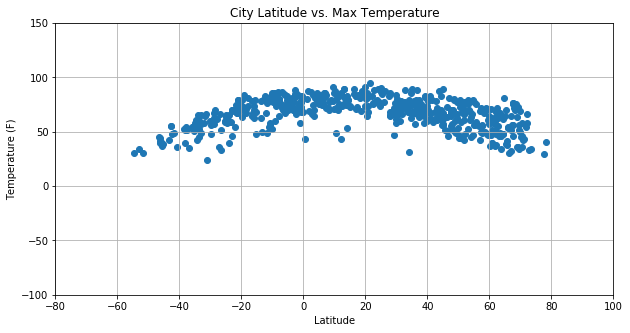

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(city_df['Latitude'], city_df['Temperature'], marker="o")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
#ranges are based on example.pdf
plt.ylim(-100, 150, 50)
plt.xlim(-80, 100, 20)
plt.grid(True)

plt.show()

## Latitude vs. Humidity Plot

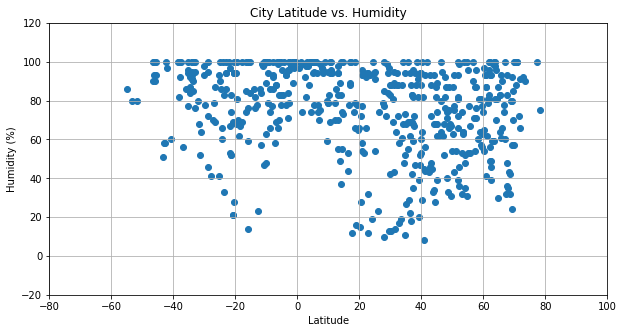

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(city_df['Latitude'], city_df['Humidity'], marker="o")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
#ranges are based on example.pdf
plt.ylim(-20, 120, 20)
plt.xlim(-80, 100, 20)
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

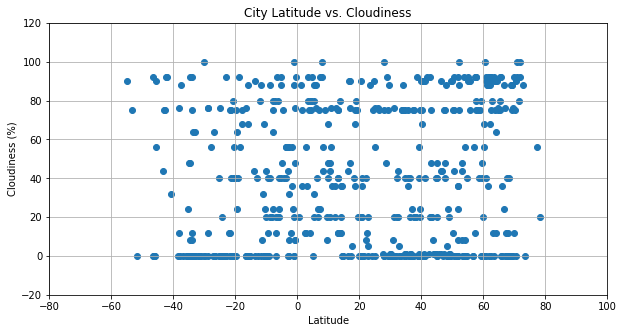

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(city_df['Latitude'], city_df['Cloudiness'], marker="o")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
#ranges are based on example.pdf
plt.ylim(-20, 120, 20)
plt.xlim(-80, 100, 20)
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

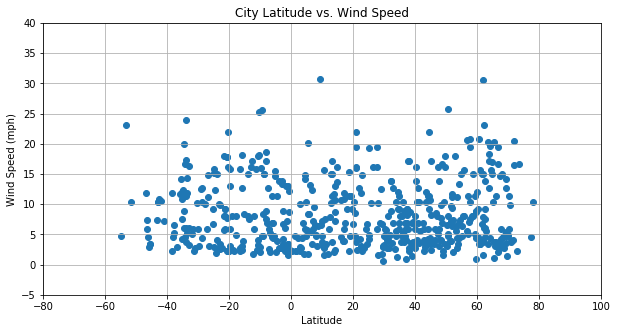

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(city_df['Latitude'], city_df['Wind Speed'], marker="o")
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
#ranges are based on example.pdf
plt.ylim(-5, 40, 5)
plt.xlim(-80, 100, 20)
plt.grid(True)

plt.show()

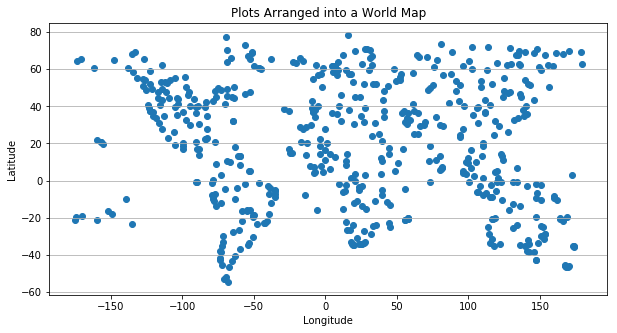

In [13]:
#cool it's a world map
plt.figure(figsize=(10,5))
plt.scatter(city_df['Longitude'], city_df['Latitude'])
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True, axis='y')
plt.title("Plots Arranged into a World Map")
plt.show()